In [45]:
import matplotlib.pyplot as plt
import networkx as nx
import json
import itertools

In [46]:
with open('twitter.json') as fp:
    data = json.load(fp)

In [47]:
messages = [x['content'] for x in data['contentItems']]

In [48]:
messages

['RT @TuitSolidarioPe: @esquinabaja @Lucho_Mora ¡Muchas gracias por unirse! Los esperamos este 3, 10 y 17 de febrero en #Miraflores con útile…',
 '@Belys16p Me llamaron diciendo que "Ya solucionaron el tema de las balanzas" XD',
 '@danielefecto Told u.',
 '@esquinabaja @Lucho_Mora ¡Tenemos todo listo para el #TuiterCole! Aquí todos los datos. Los esperamos este 3,10 y 1… https://t.co/NDrT8OKXu5',
 'Hoy cerraré el día feliz. Es la premiere de #MazeRunner #LaCuraMortal 😍 https://t.co/rKpgwjGgJp',
 '@Lucho_Mora JAJAJAJAJAJAJJAJAJAJJFSAGDFGDSASFGDS',
 '@esquinabaja ¿Y? Que lo hagan, que lo sigan haciendo. PARA MI se les ve ridículos cuando con cosas que no les gusta… https://t.co/cBw6bEmJfS',
 'RT @JuanCarlosLL: Lo que ha pasado con @TheBEAT_Lima nos obliga a exigir a todas las apps que muestren sus procesos de reclutamiento de uni…',
 '@esquinabaja ¿?',
 '@esquinabaja Es que soy un masoquista consumidor amante del capitalismo. BTW me han llamado para decirme que "ya so… https://t.co/sgGwX

In [49]:
def to_word_tuples(message):
    '''
        return word tuples from all the combination within a list
    '''
    words = message.split()
    return list(filter(lambda wt: wt[0] != wt[1],(itertools.combinations(words, 2))))

In [58]:
#This a way to flatmap a list of lists
#flatten_tuples = [w for wt in messages for w in to_word_tuples(wt)]

In [59]:
#Parallelizing the list of messages
messages_rdd = sc.parallelize(messages)

In [66]:
#Map the message to word tuples and flats it
#Map tuples to (tuple,1)
#Reduces it by key
#Formats it to match weighted edges
word_edges = messages_rdd.flatMap(lambda x: to_word_tuples(x))\
            .map(lambda wt: (wt,1))\
            .reduceByKey(lambda x,y:x+y)\
            .sortBy(lambda x:x[1])\
            .map(lambda x: (x[0][0], x[0][1], x[1]))\
            .collect()

In [67]:
word_edges[-1]

('de', 'y', 12)

In [68]:
WG = nx.Graph()

In [69]:
for e in word_edges:
    try:
        WG[e[0]][e[1]]['weight'] += e[2]
    except:
        WG.add_weighted_edges_from([e])
        

In [70]:
esmall=[(u,v) for (u,v,d) in WG.edges(data=True) if d['weight'] <=4]
elarge=[(u,v) for (u,v,d) in WG.edges(data=True) if d['weight'] >4]

In [57]:
elarge

[('para', 'de'),
 ('para', 'y'),
 ('para', 'que'),
 ('si', 'de'),
 ('RT', 'de'),
 ('me', 'que'),
 ('les', 'que'),
 ('les', 'lo'),
 ('les', 'de'),
 ('no', 'de'),
 ('no', 'que'),
 ('en', 'que'),
 ('en', 'de'),
 ('en', 'y'),
 ('se', 'que'),
 ('estoy', 'a'),
 ('a', 'la'),
 ('a', 'un'),
 ('a', 'de'),
 ('a', 'y'),
 ('a', 'que'),
 ('a', 'con'),
 ('las', 'que'),
 ('los', 'que'),
 ('lo', 'que'),
 ('cocinarlo', 'que'),
 ('del', 'que'),
 ('tener', 'de'),
 ('y', 'de'),
 ('y', 'la'),
 ('y', 'con'),
 ('y', 'que'),
 ('que', 'con'),
 ('que', 'de'),
 ('que', 'arroz'),
 ('que', 'el'),
 ('que', 'hacer'),
 ('que', 'Les'),
 ('que', 'un'),
 ('que', 'algo'),
 ('que', 'la'),
 ('la', 'de'),
 ('la', 'con'),
 ('la', 'el'),
 ('mi', 'de'),
 ('con', 'de'),
 ('de', 'el'),
 ('de', 'un'),
 ('de', 'por')]

In [35]:
pos=nx.spring_layout(WG) # positions for all nodes

In [36]:
nx.draw_networkx_nodes(WG,pos,node_size=700)

In [42]:
nx.draw_networkx_edges(WG,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(WG,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

In [43]:
nx.draw_networkx_labels(WG,pos,font_size=20,font_family='sans-serif')

{'"Ya': <matplotlib.text.Text at 0x1140980b8>,
 '"un': <matplotlib.text.Text at 0x1136e9b38>,
 '"ya': <matplotlib.text.Text at 0x113a645f8>,
 '#Ancon.': <matplotlib.text.Text at 0x113cbeb38>,
 '#ChilcanosenNudaRestoBar': <matplotlib.text.Text at 0x113cde0b8>,
 '#Coco': <matplotlib.text.Text at 0x113e530b8>,
 '#Coco!': <matplotlib.text.Text at 0x113ac25f8>,
 '#Disney': <matplotlib.text.Text at 0x113a2bb38>,
 '#DragonBallSuper': <matplotlib.text.Text at 0x114057b38>,
 '#FranciscoEnPeru': <matplotlib.text.Text at 0x113a0bb38>,
 '#FranciscoEnPerú': <matplotlib.text.Text at 0x1141645f8>,
 '#Independencia': <matplotlib.text.Text at 0x11411f5f8>,
 '#InfinityWar!': <matplotlib.text.Text at 0x113a8a5f8>,
 '#LaCuraMortal': <matplotlib.text.Text at 0x11414f0b8>,
 '#LaCuraMortal?': <matplotlib.text.Text at 0x113ef2b38>,
 '#Lollapalooza': <matplotlib.text.Text at 0x113ac20b8>,
 '#LosOlivos,': <matplotlib.text.Text at 0x1138945f8>,
 '#MazeRunner': <matplotlib.text.Text at 0x11410a5f8>,
 '#Miraflores

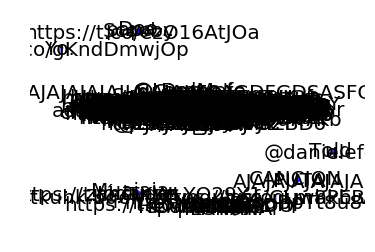

In [44]:
plt.axis('off')
#plt.savefig("weighted_graph.png") # save as png
plt.show() # display